## Import Libraries

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import cv2
import os
import glob

## Statistical analysis/modeling

### Load Dataset

In [4]:
images = []
labels = []
imagesDictionary = {}
pathName = "CorelDB_merged/"
imgSize = 64

In [5]:
# create empty imagesDictionary
for dirName, subdirList, fileList in os.walk(pathName):
    for fileName in fileList:
        base, extension = os.path.splitext(fileName)
        if extension == '.jpg':
            label = os.path.basename(dirName)
            numImages = len(glob.glob1(dirName, "*.jpg"))
            imagesDictionary[label] = np.zeros(shape=(numImages, imgSize, imgSize, 3), dtype=np.uint8)

In [6]:
# create imagesDictionary where the key - label and value - set of images corresponding to that label
for dirName, subdirList, fileList in os.walk(pathName):
    i = 0
    for fileName in fileList:
        base, extension = os.path.splitext(fileName)
        if extension == '.jpg':
            label = os.path.basename(dirName)
            imagePath = f"{dirName}/{fileName}"
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (imgSize, imgSize))
            imagesDictionary[label][i,:,:,:] = image
            i += 1

In [7]:
# check that dictionary was created correctly
for key in imagesDictionary.keys():
    print(f"{key} - {imagesDictionary[key].shape}")

ANIMALS - (2650, 64, 64, 3)
ART - (600, 64, 64, 3)
BUILDINGS - (970, 64, 64, 3)
FOOD - (200, 64, 64, 3)
PEOPLE - (850, 64, 64, 3)
PLANTS - (600, 64, 64, 3)
SCENERY - (1810, 64, 64, 3)
TEXTURE - (600, 64, 64, 3)
VEHICLE - (1110, 64, 64, 3)


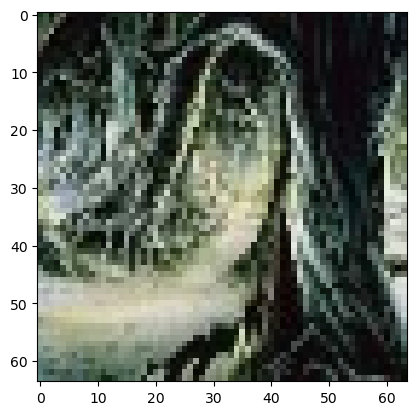

In [10]:
# check that dictionary was created correctly
testImg = imagesDictionary['ART'][0,:,:,:]
testImgRGB = cv2.cvtColor(testImg, cv2.COLOR_BGR2RGB)
plt.imshow(testImgRGB)

### Histogram/PDF

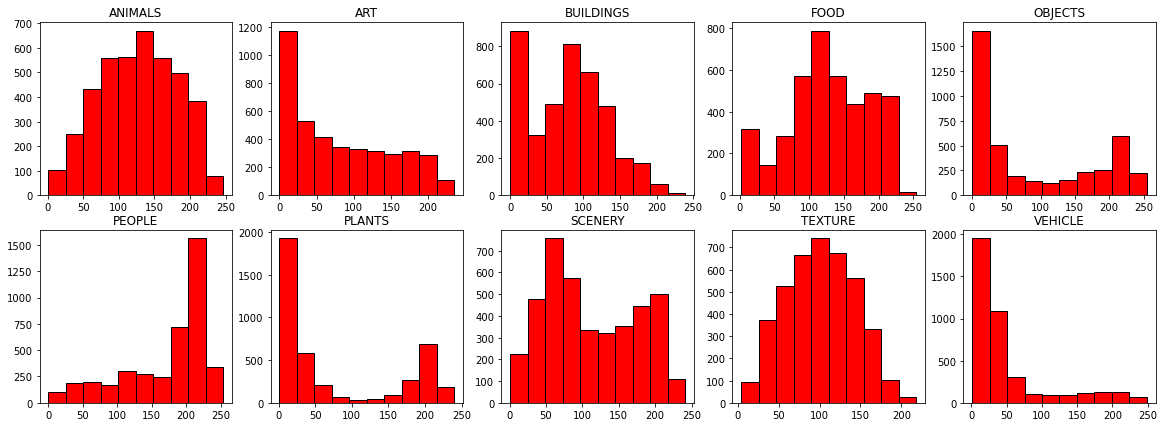

In [39]:
# red channel histogram
plt.figure(figsize=(20, 7))
for num_class, label in enumerate(imagesDictionary.keys()):
    plt.subplot(2, 5, num_class  + 1)
    plt.hist(imagesDictionary[label][0, :, :, 2].flatten(), color = "red", edgecolor="black")
    plt.title(f"{label}")
    # plt.savefig(f"merged_dataset_red_channel.jpg")
plt.show()

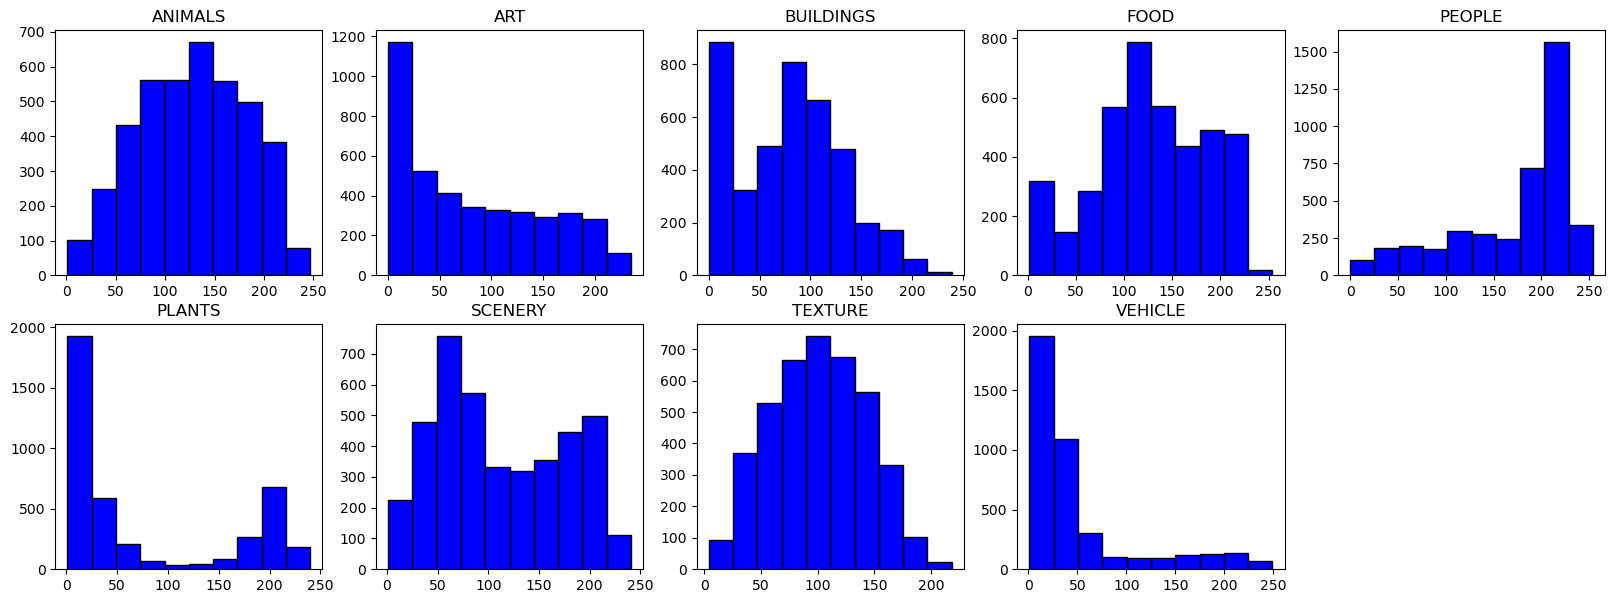

In [14]:
# blue channel histogram
plt.figure(figsize=(20, 7))
for num_class, label in enumerate(imagesDictionary.keys()):
    plt.subplot(2, 5, num_class  + 1)
    plt.hist(imagesDictionary[label][0, :, :, 2].flatten(), color = "blue", edgecolor="black")
    plt.title(f"{label}")
    # plt.savefig(f"merged_dataset_blue_channel.jpg")
plt.show()

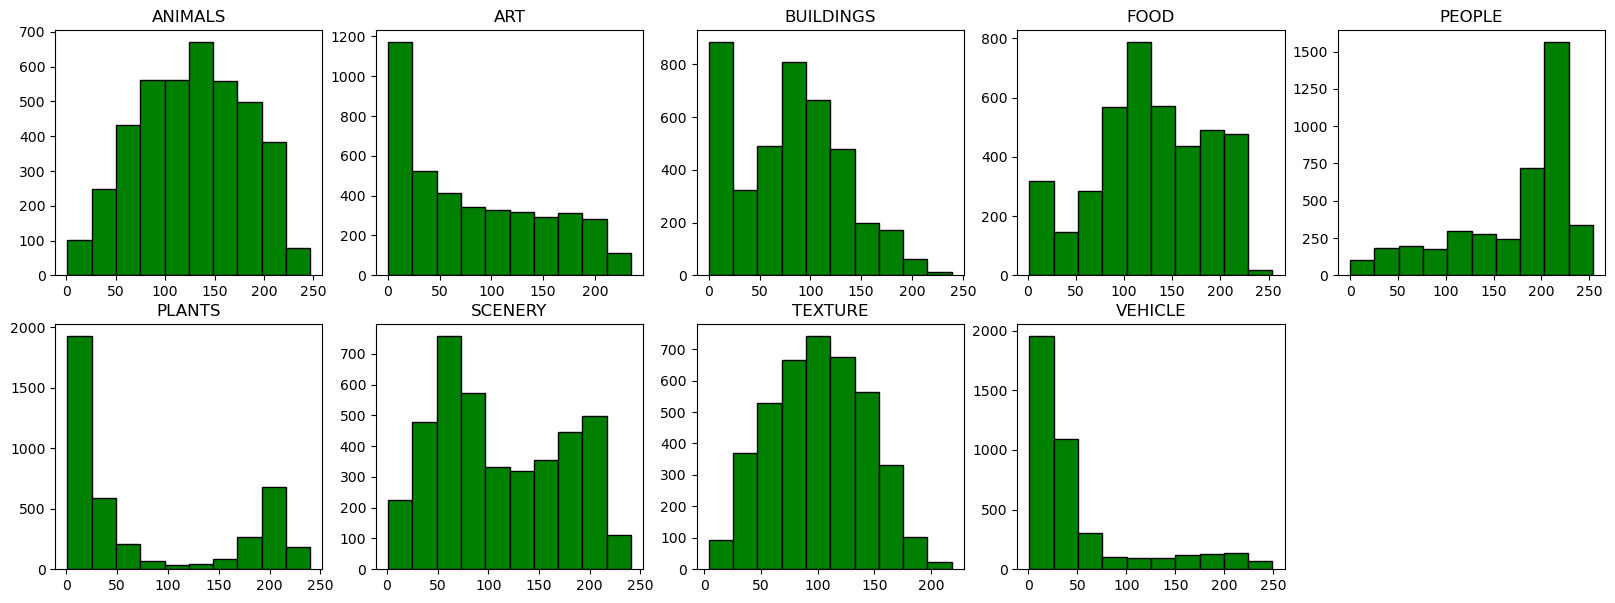

In [15]:
# green channel histogram
plt.figure(figsize=(20, 7))
for num_class, label in enumerate(imagesDictionary.keys()):
    plt.subplot(2, 5, num_class  + 1)
    plt.hist(imagesDictionary[label][0, :, :, 2].flatten(), color = "green", edgecolor="black")
    plt.title(f"{label}")
    # plt.savefig(f"merged_dataset_green_channel.jpg")
plt.show()

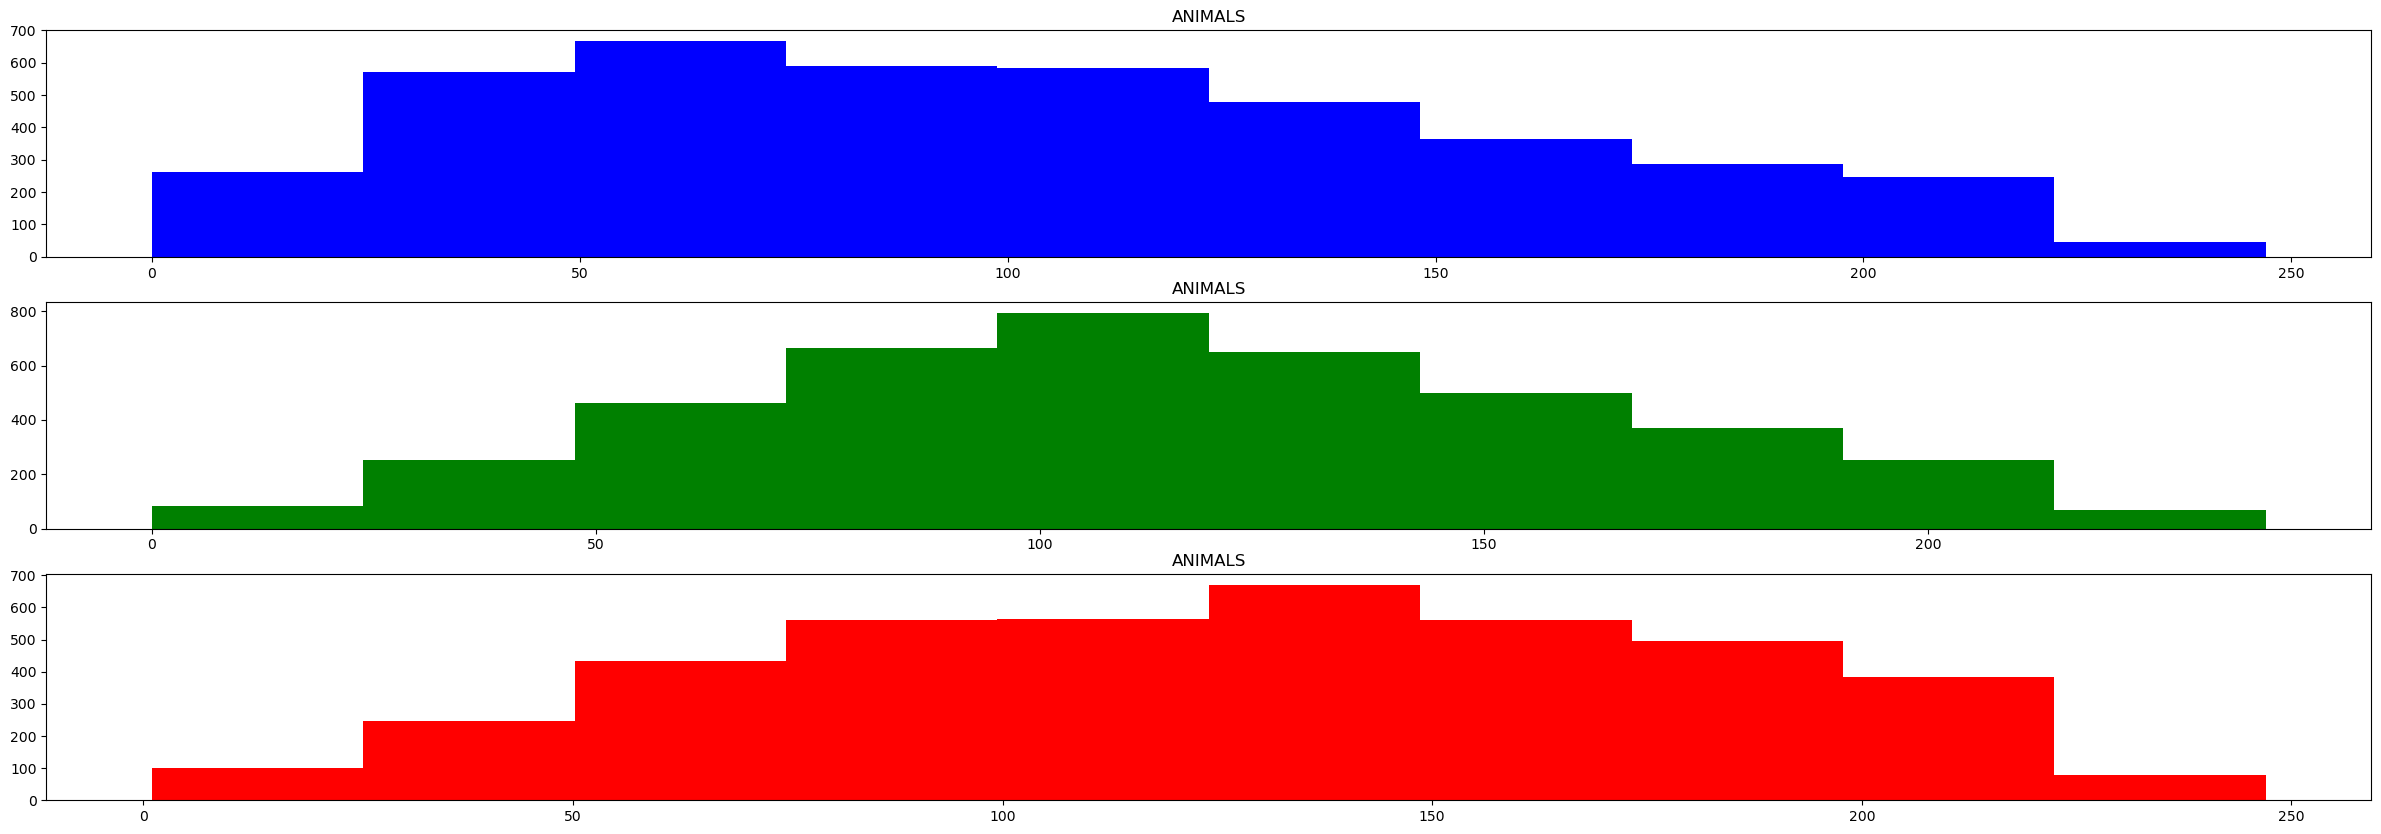

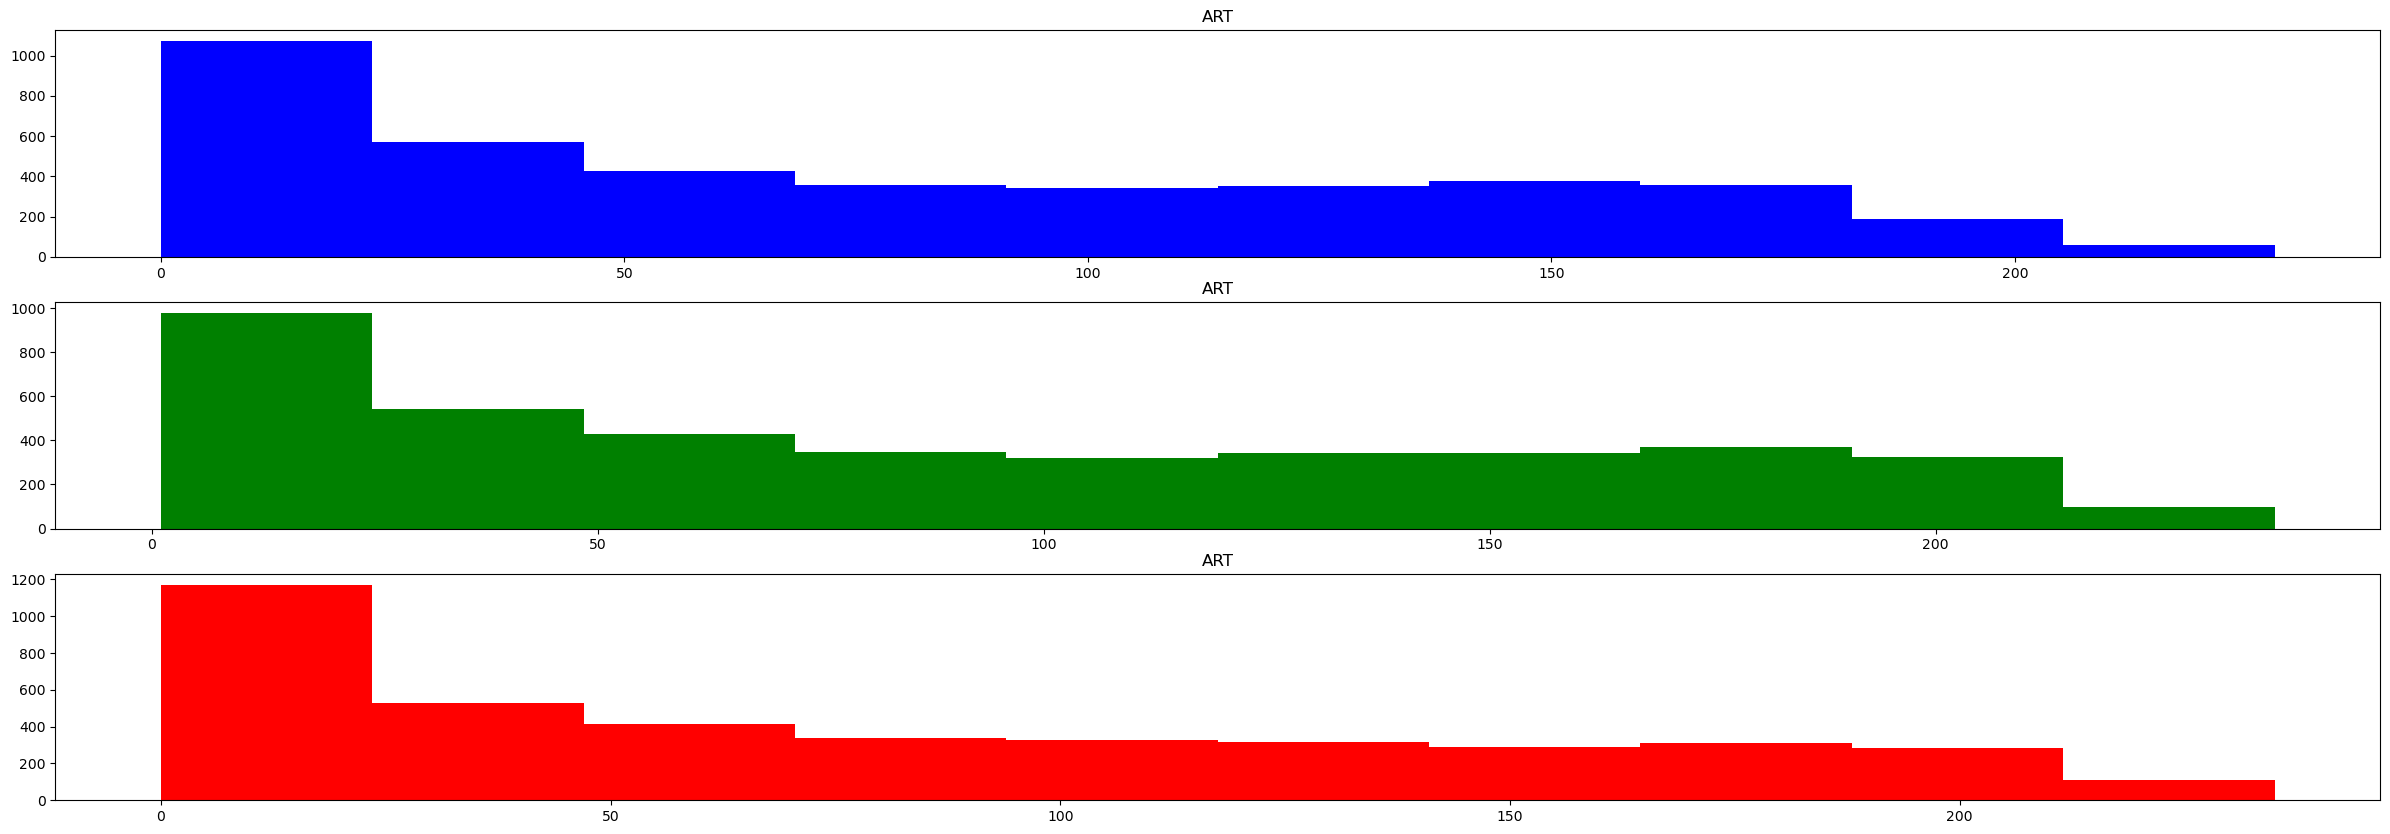

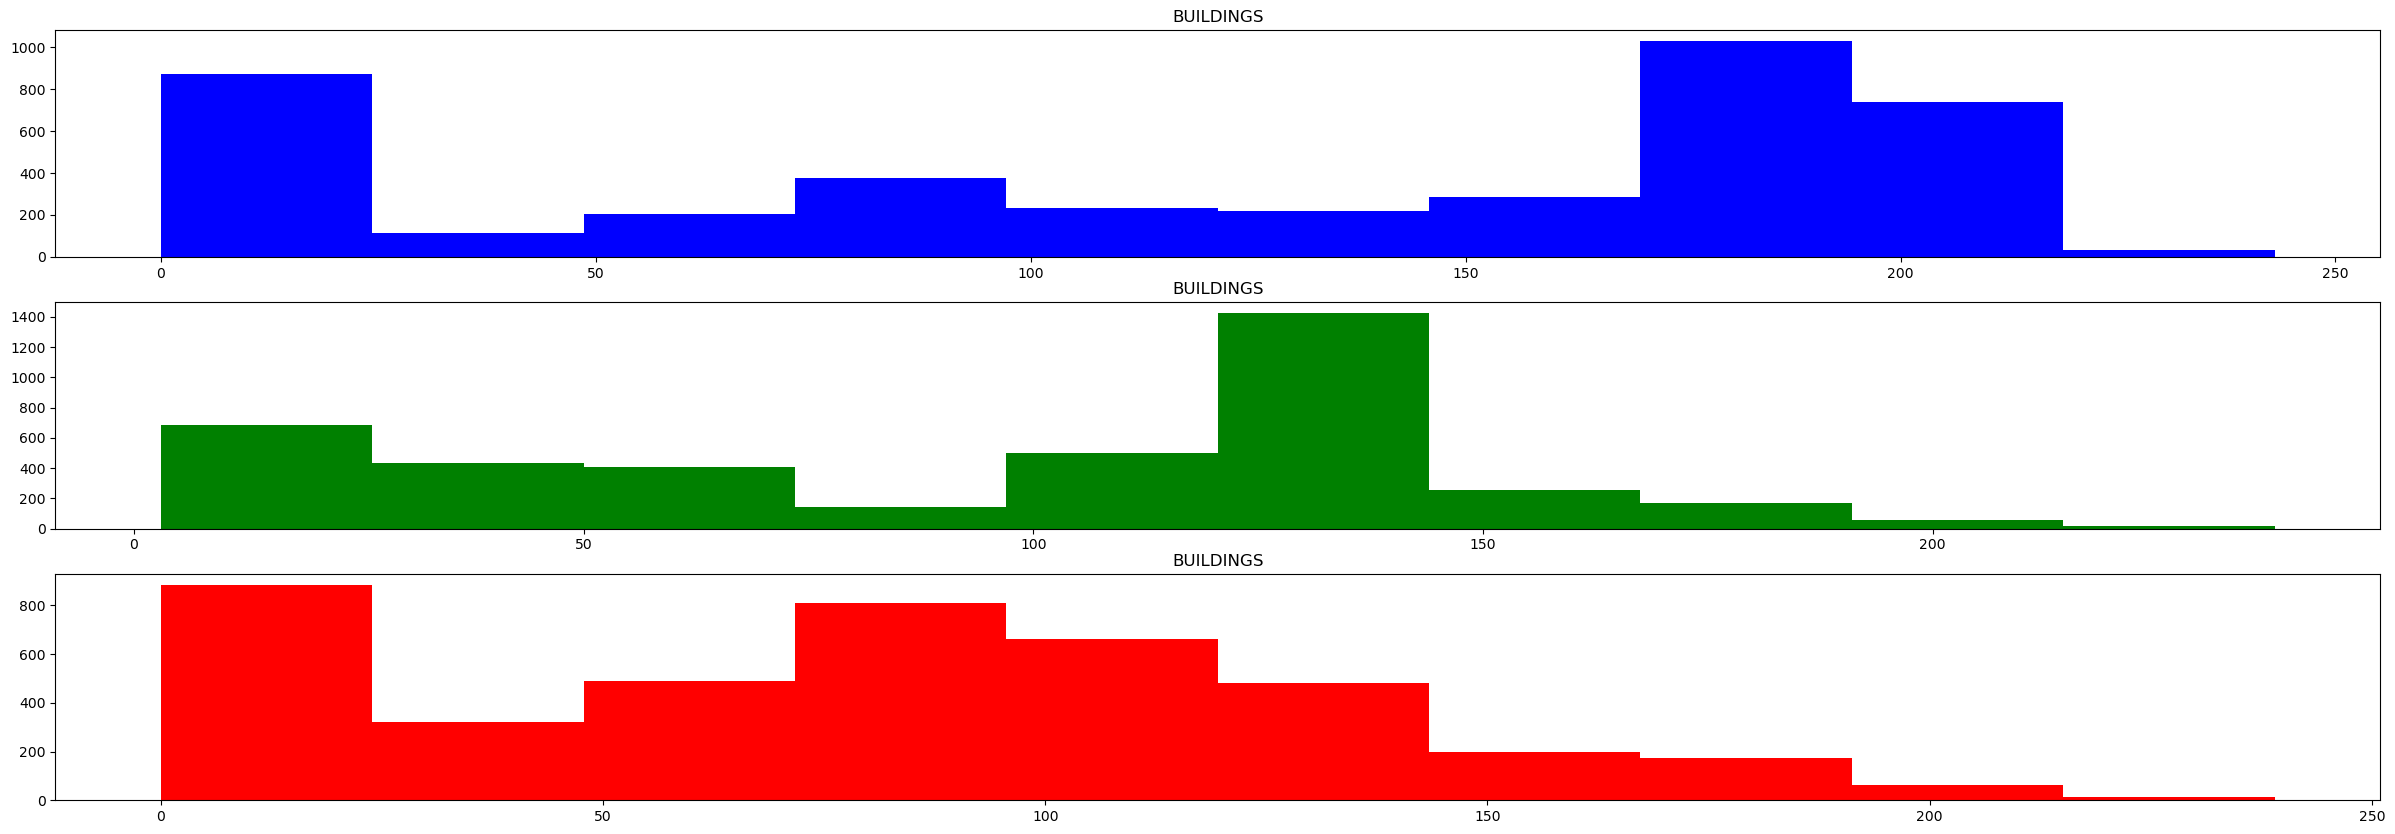

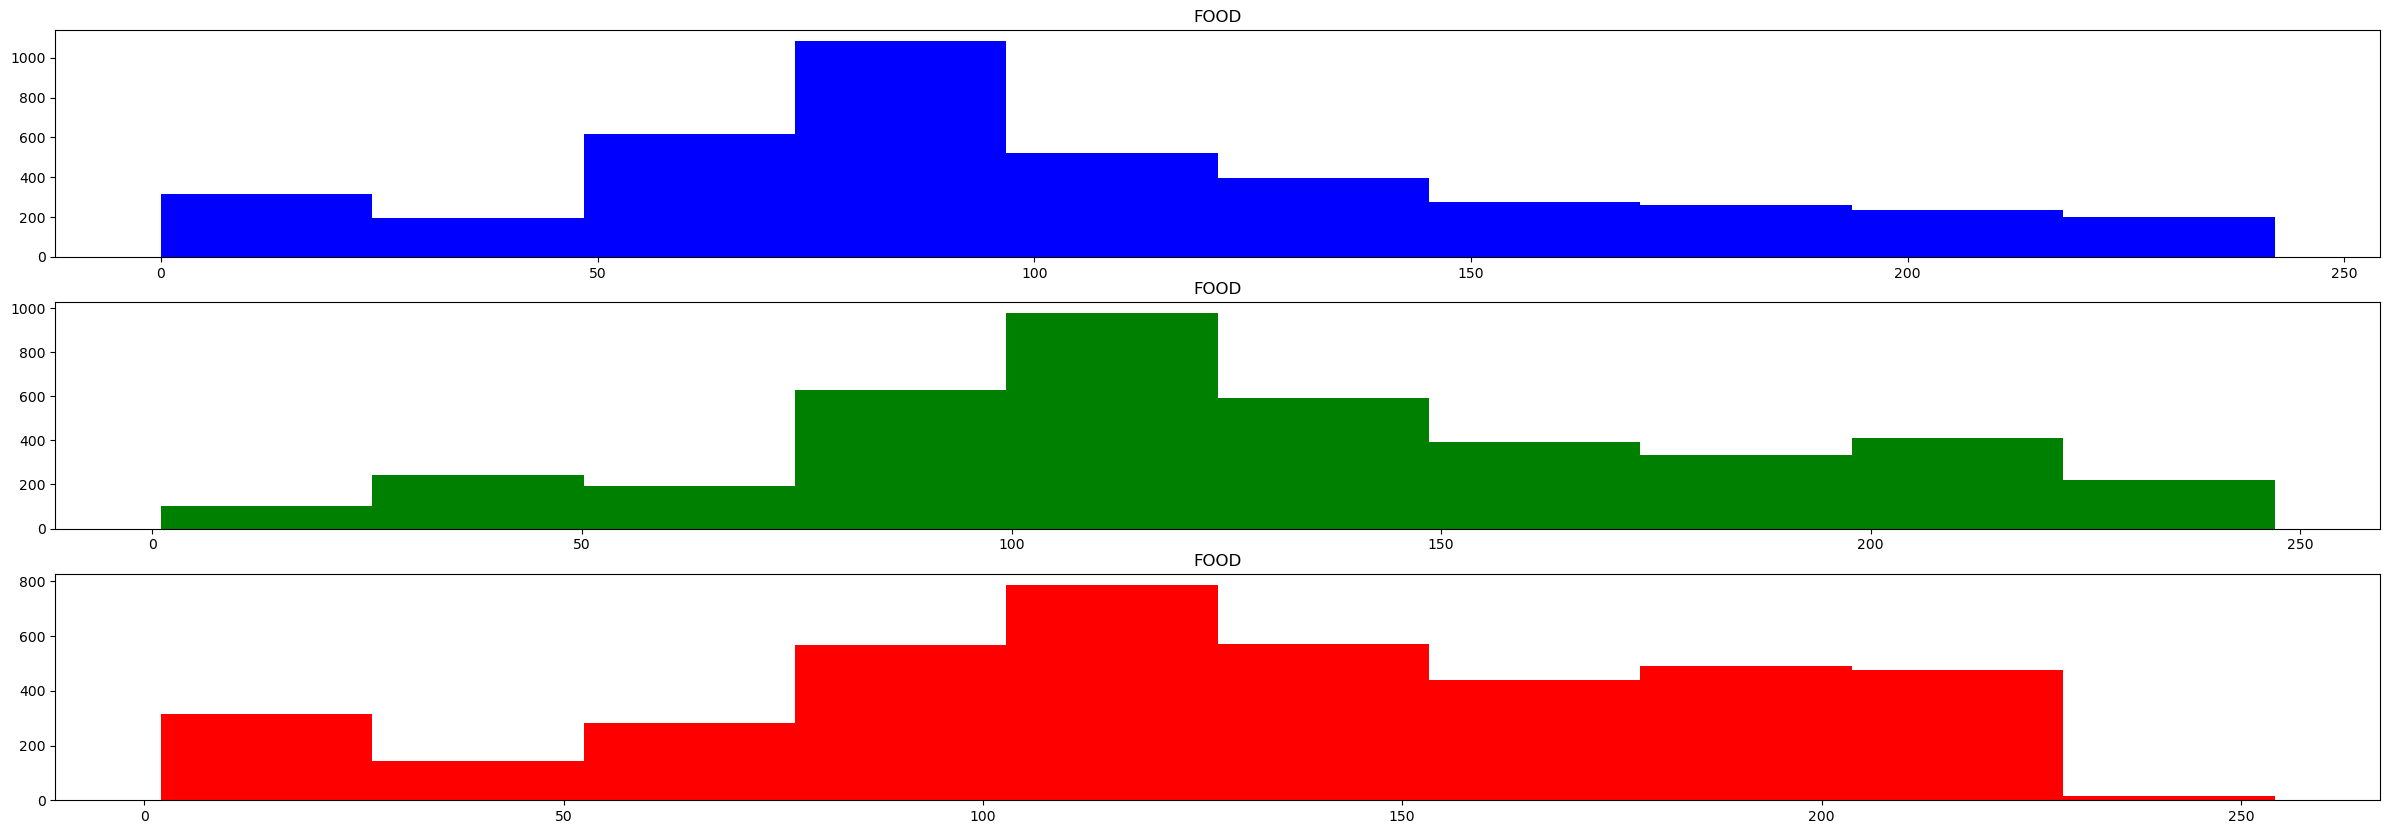

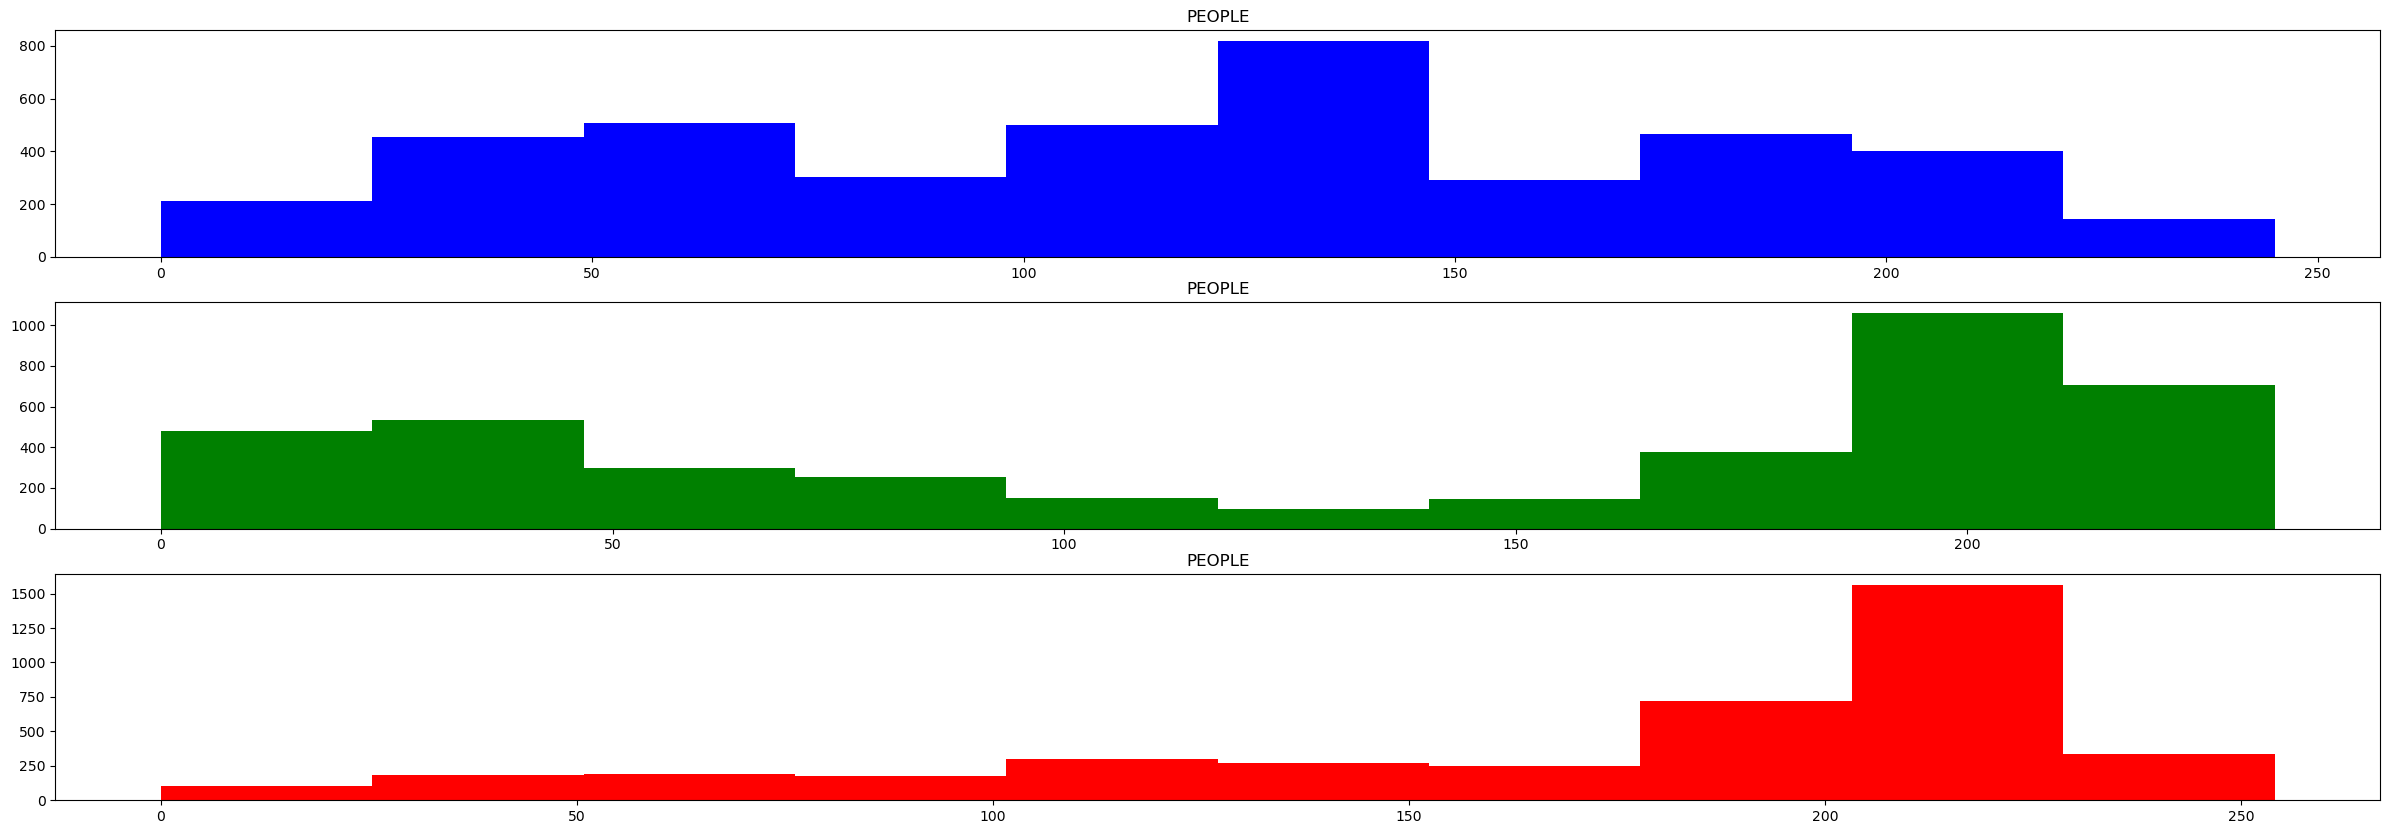

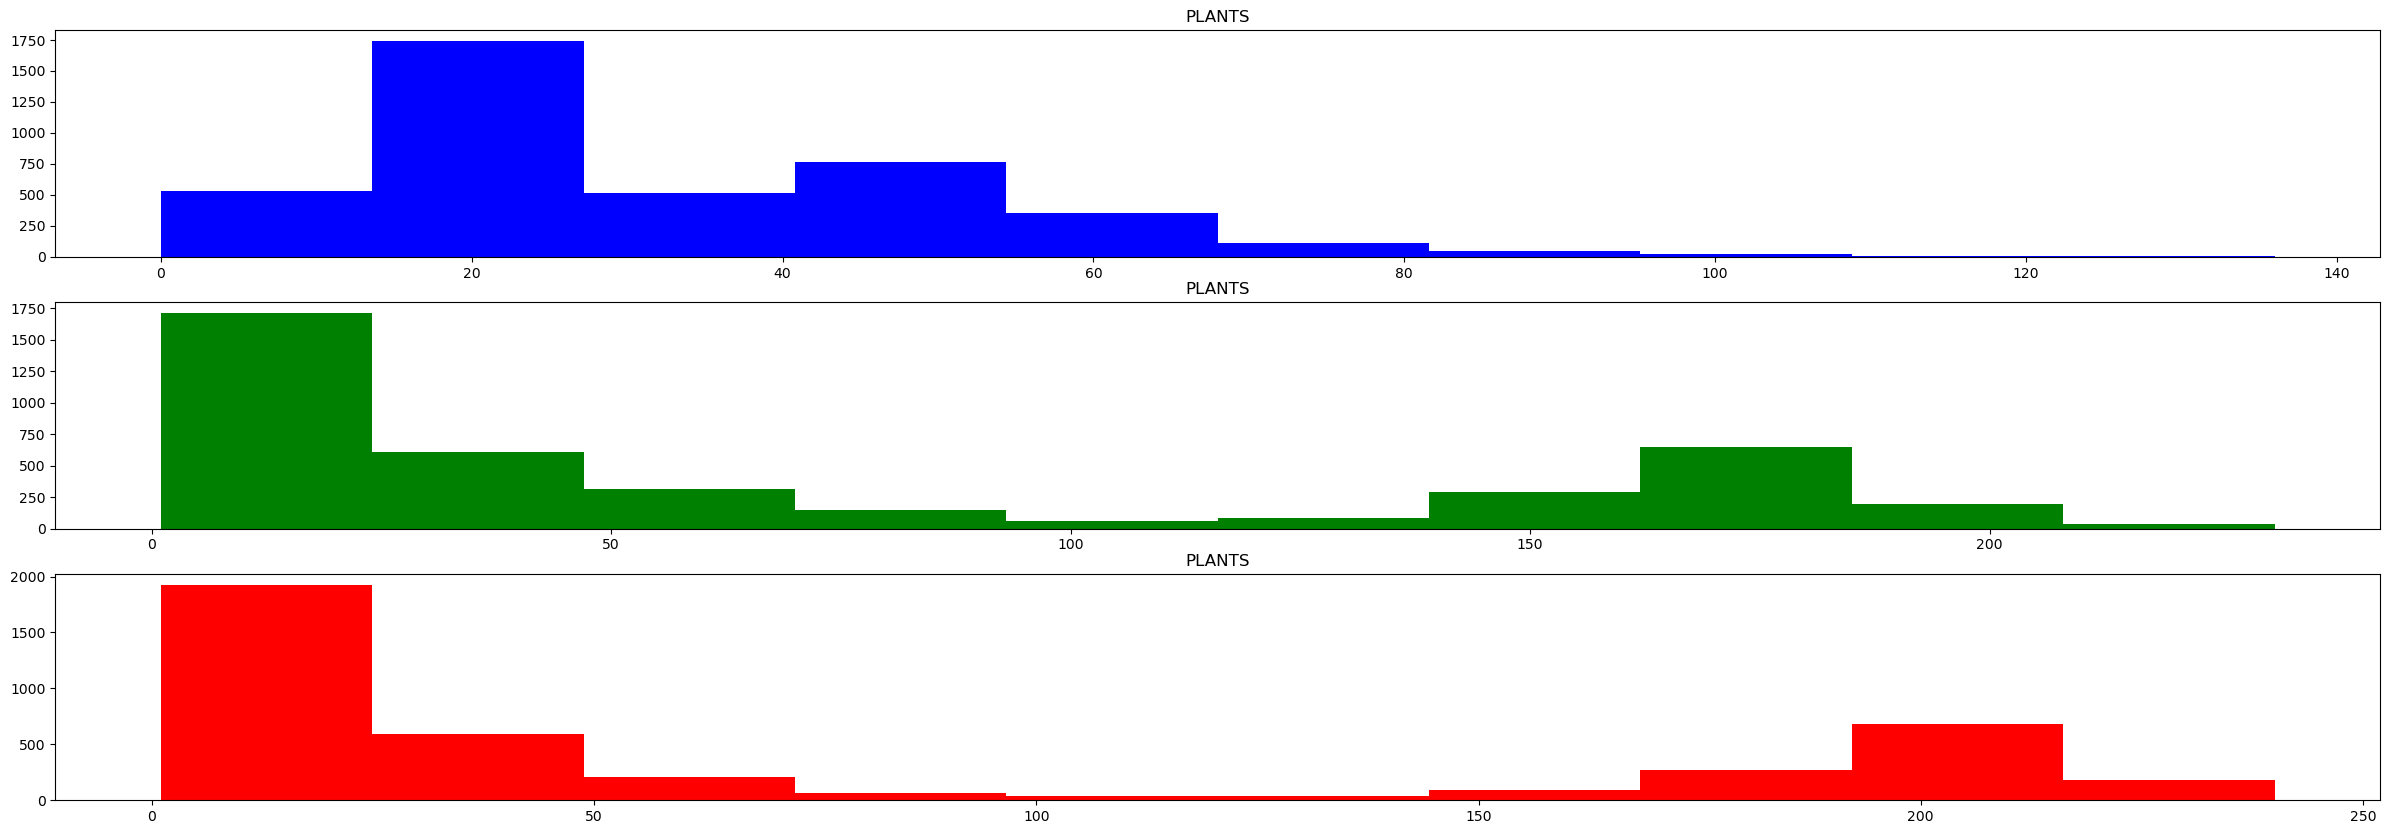

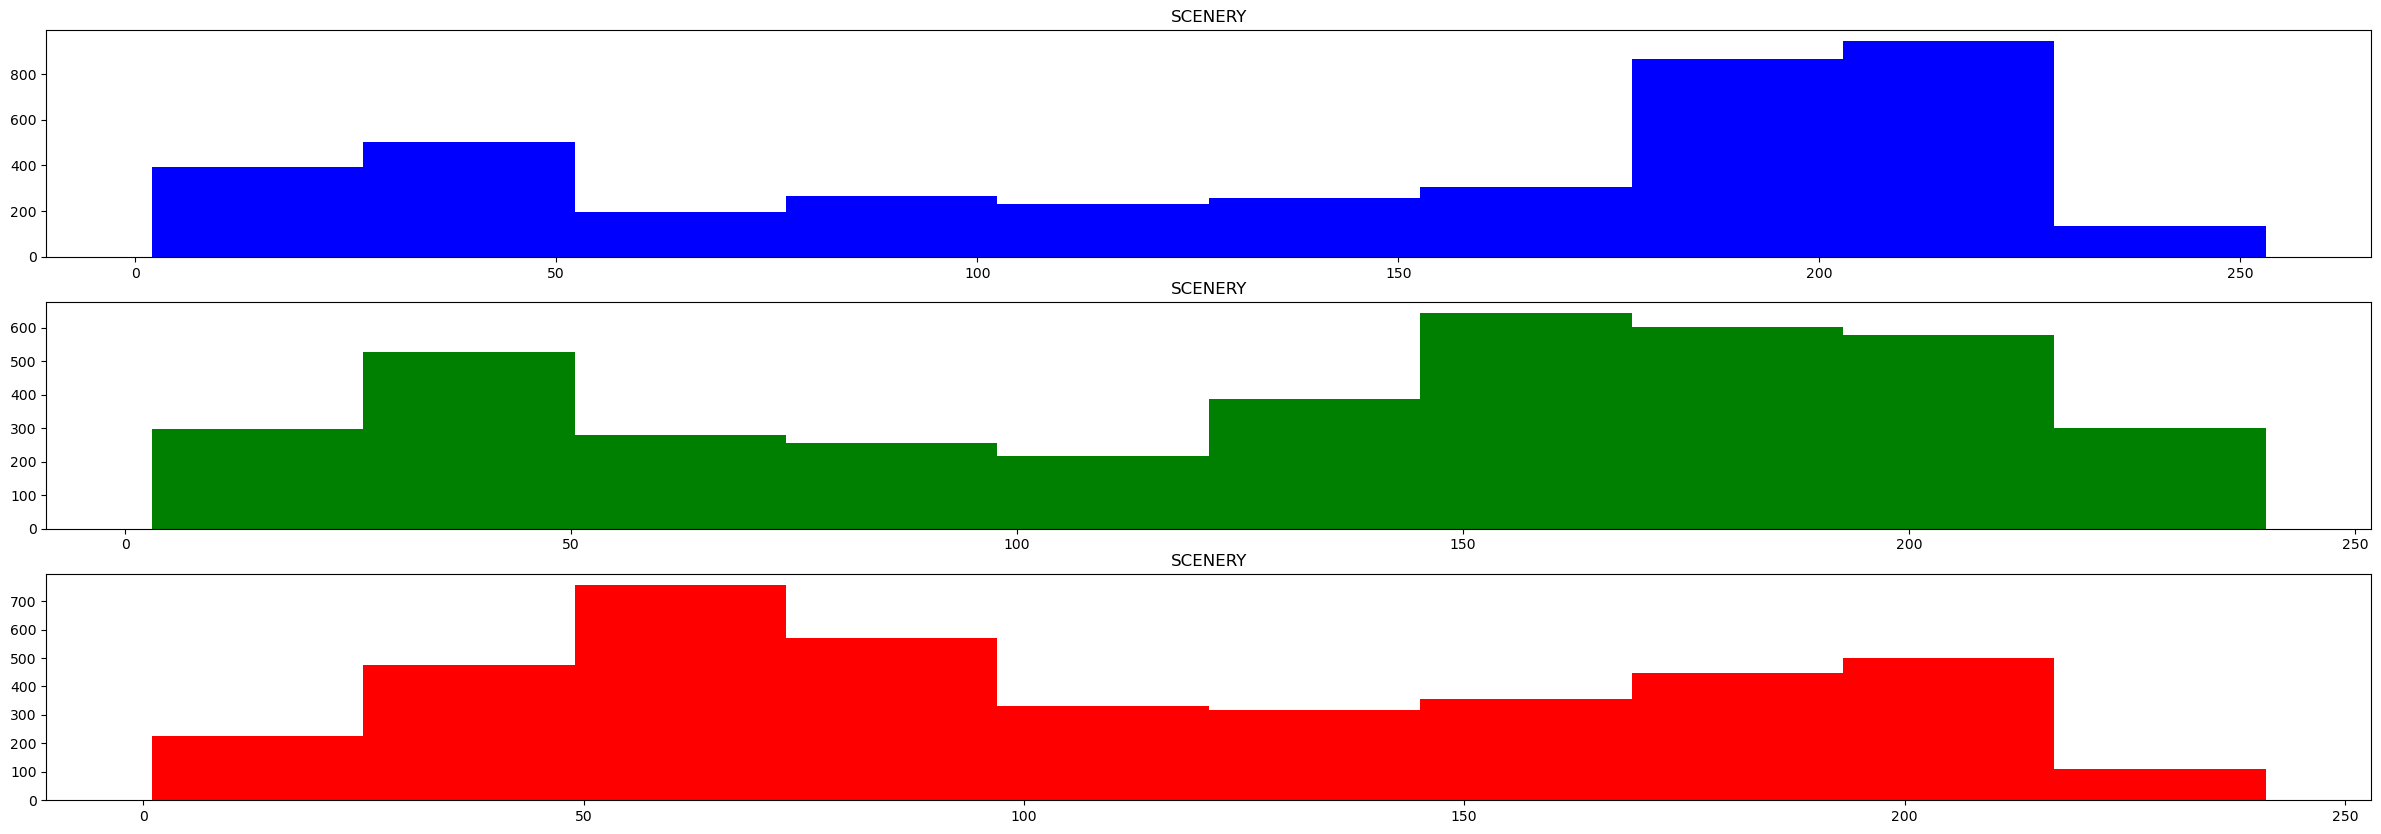

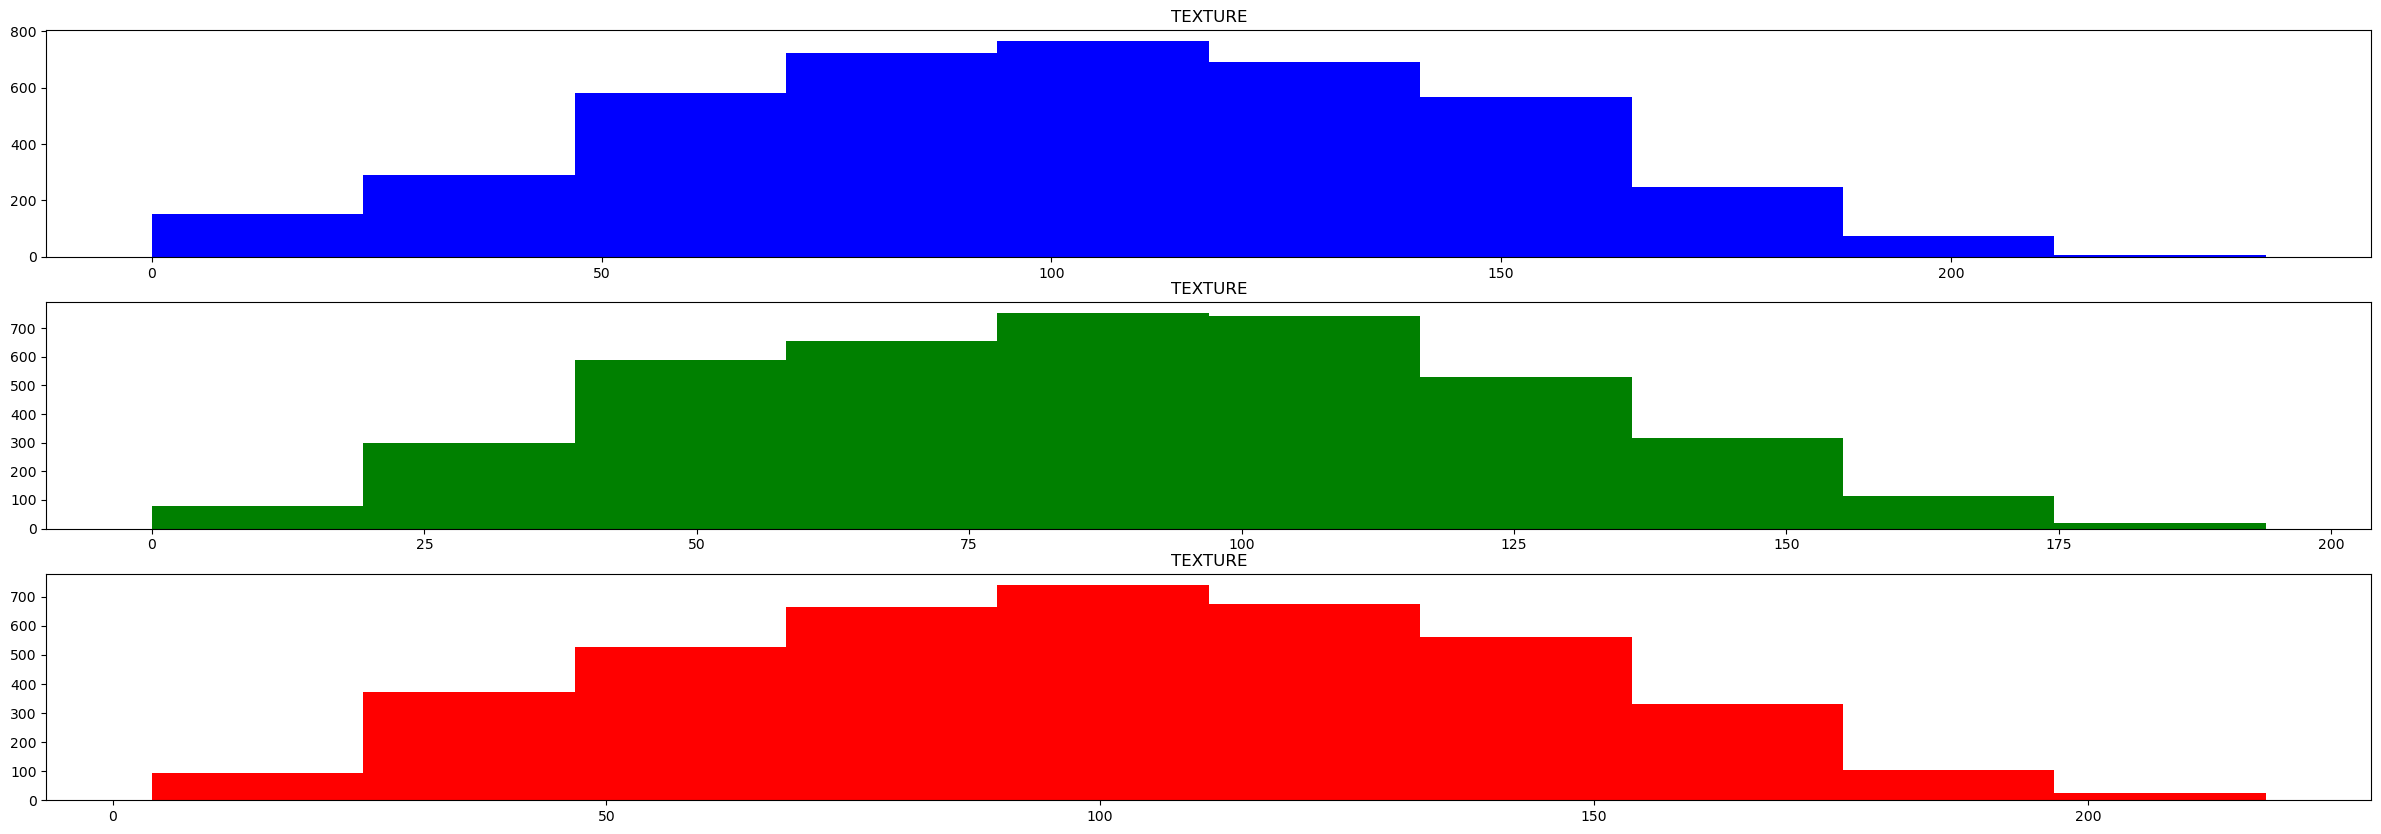

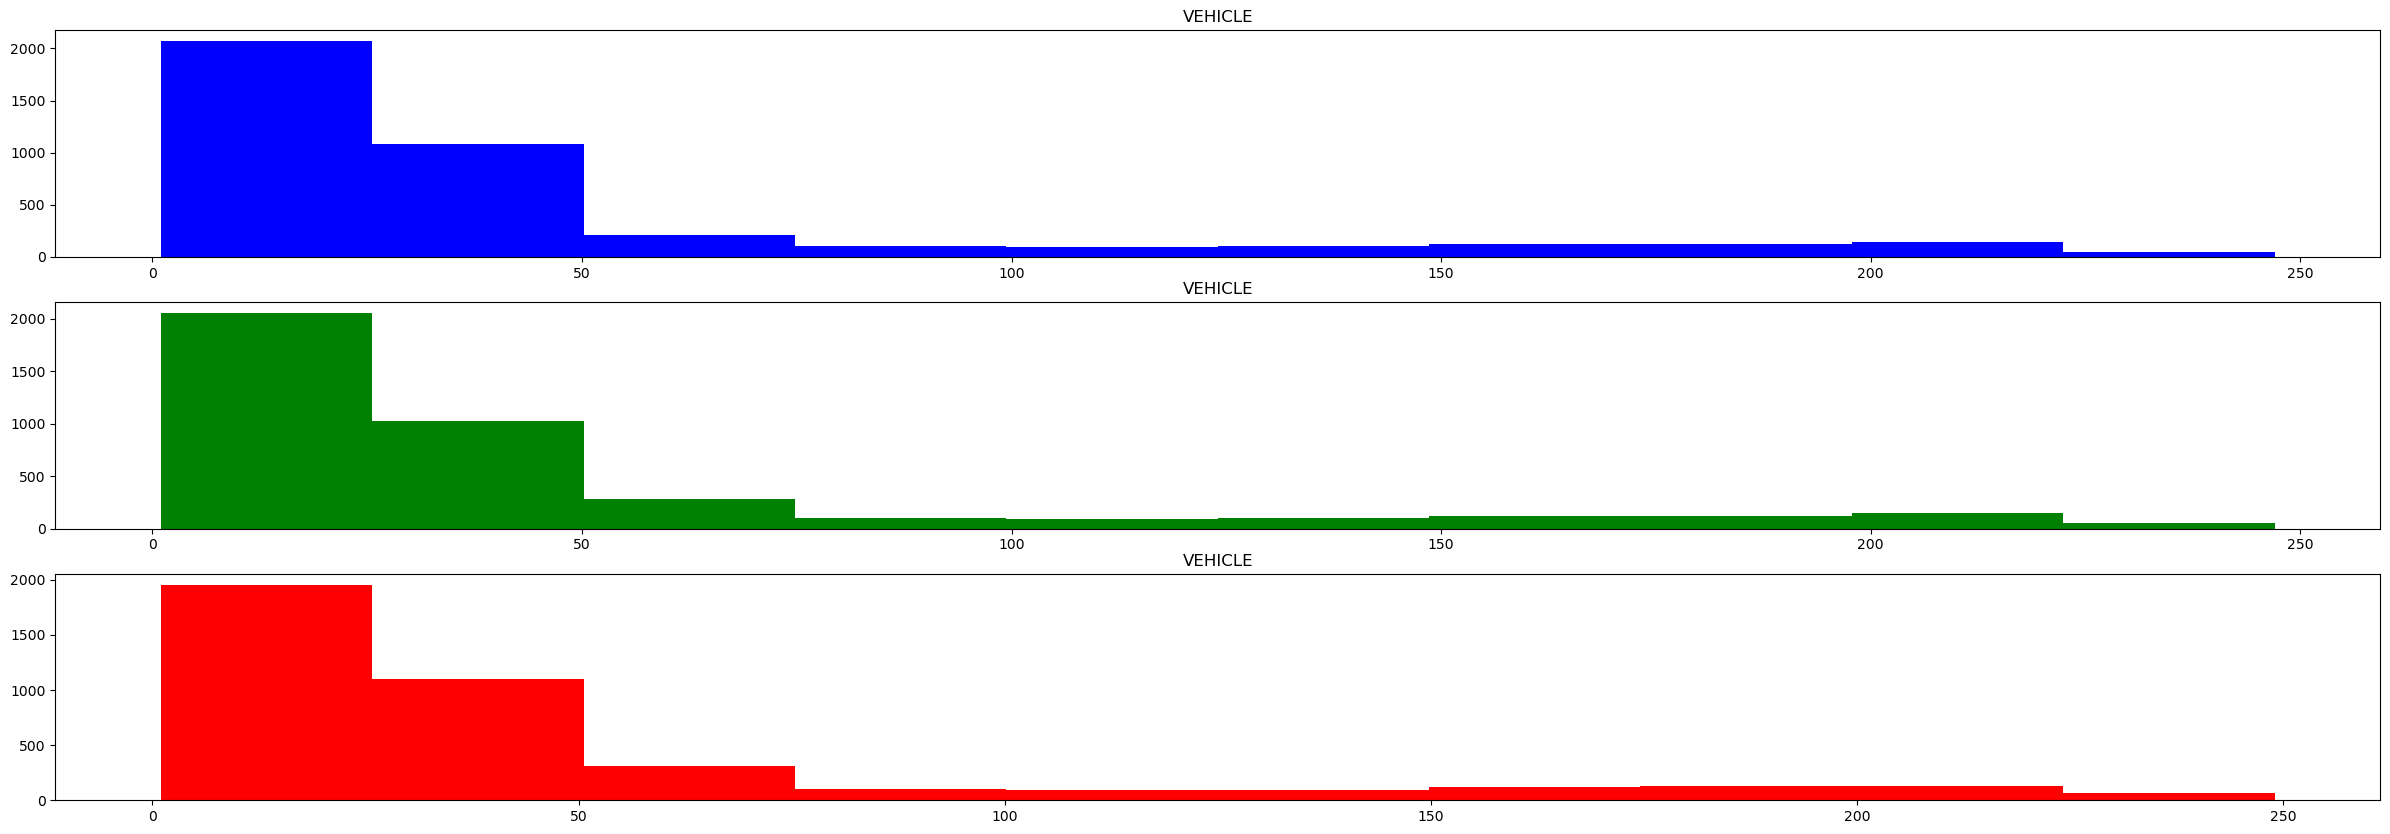

In [17]:
colors_dictionary = {"blue": 0, "green": 1, "red": 2}
for num_class, label in enumerate(imagesDictionary.keys()):
    plt.figure(figsize=(30, 10))
    for i, color_name in enumerate(colors_dictionary.keys()):
        plt.subplot(3, 1, i + 1)
        plt.hist(imagesDictionary[label][0, :, :, colors_dictionary[color_name]].flatten(), color = color_name)
        plt.title(f"{label}")
    # plt.savefig(f"histograma/{label}.jpg")

Text(0, 0.5, 'Pixel Count')

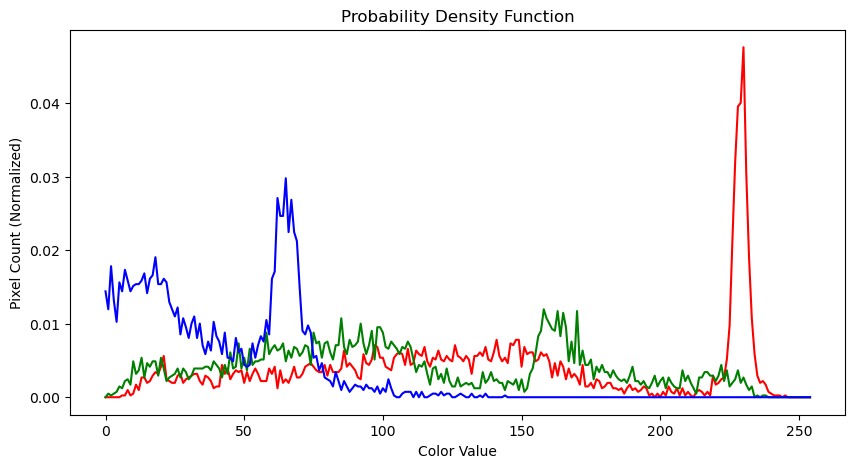

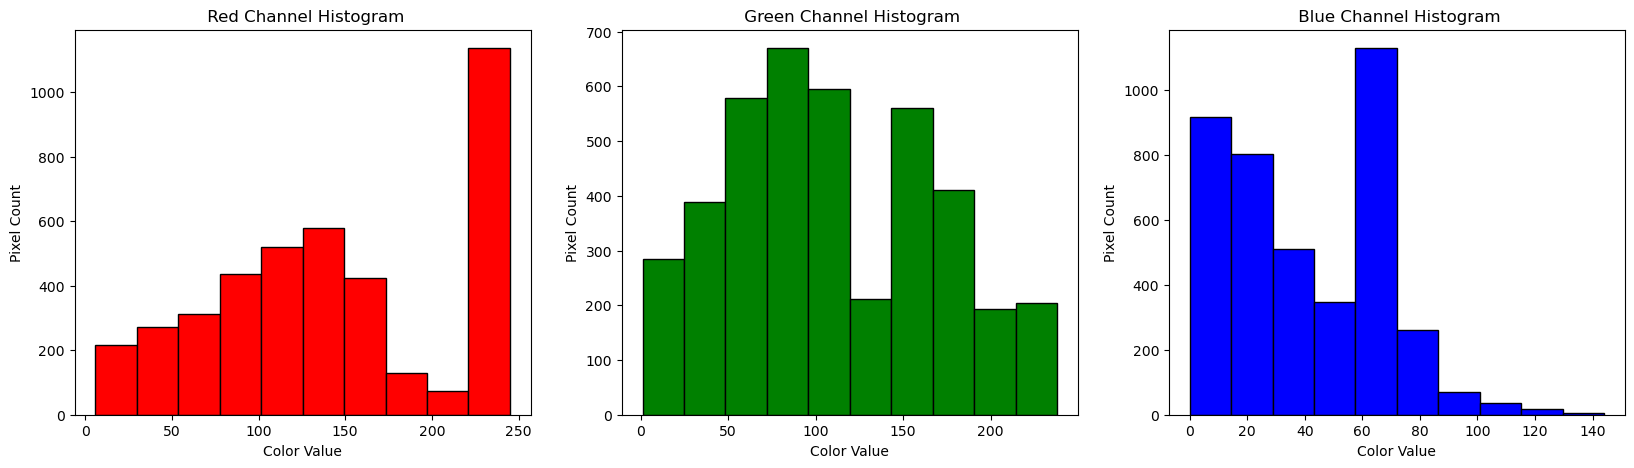

In [18]:
image = imagesDictionary['ART'][3, :, :, :]
image =  cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image_r = image[:, :, 0]
image_g = image[:, :, 1]
image_b = image[:, :, 2]

hist_r_pdf, bin_edges_r = np.histogram(image_r, bins=list(range(256)), density=True)
hist_g_pdf, bin_edges_g = np.histogram(image_g, bins=list(range(256)), density=True)
hist_b_pdf, bin_edges_b = np.histogram(image_b, bins=list(range(256)), density=True)

hist_r, bin_edges_r = np.histogram(image_r, bins=list(range(256)), density=False)
hist_g, bin_edges_g = np.histogram(image_g, bins=list(range(256)), density=False)
hist_b, bin_edges_b = np.histogram(image_b, bins=list(range(256)), density=False)


plt.figure(figsize=(10, 5))
plt.plot(hist_r_pdf, color="red")
plt.plot(hist_g_pdf, color="green")
plt.plot(hist_b_pdf, color="blue")
plt.title("Probability Density Function")
plt.xlabel("Color Value")
plt.ylabel("Pixel Count (Normalized)")
# plt.savefig("probability_density_function.jpg")


plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plt.hist(image_r.flatten(), color = "red",  edgecolor='black')
plt.title(" Red Channel Histogram")
plt.xlabel("Color Value")
plt.ylabel("Pixel Count")
plt.subplot(1, 3, 2)
plt.hist(image_g.flatten(), color = "green", edgecolor='black') 
plt.title(" Green Channel Histogram")
plt.xlabel("Color Value")
plt.ylabel("Pixel Count")
plt.subplot(1, 3, 3)
plt.hist(image_b.flatten(), color = "blue", edgecolor='black') 
plt.title(" Blue Channel Histogram")
plt.xlabel("Color Value")
plt.ylabel("Pixel Count")
# plt.savefig("color_histogram.jpg")

### Statistical Test

In [19]:
uniform_distribution = stats.uniform.rvs(size=255)
normal_distribution = stats.norm.rvs(size=255)
rayleigh_distribution = stats.rayleigh.rvs(size=255)
exponential_distribution = stats.expon.rvs(size=255)

In [20]:
statistical_test_dictionary = {"uniform": [], 
                               "normal": [], 
                               "rayleigh": [], 
                               "exponential": []}

In [21]:
for num_class, label in enumerate(imagesDictionary.keys()):
    image = imagesDictionary[label][0, :, :, :]
    image =  cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    hist, bin_edges = np.histogram(image, bins=list(range(256)), density=True)
    statistical_test_dictionary["uniform"].append((label, 
                                                   stats.ks_2samp(uniform_distribution, hist)))
    statistical_test_dictionary["normal"].append((label, 
                                                   stats.ks_2samp(normal_distribution, hist)))
    statistical_test_dictionary["rayleigh"].append((label, 
                                                   stats.ks_2samp(rayleigh_distribution, hist)))
    statistical_test_dictionary["exponential"].append((label, 
                                                   stats.ks_2samp(exponential_distribution, hist)))

In [22]:
statistical_test_dictionary

{'uniform': [('ANIMALS',
   KstestResult(statistic=0.9882352941176471, pvalue=3.713560838341082e-145, statistic_location=0.009765625, statistic_sign=-1)),
  ('ART',
   KstestResult(statistic=0.9764705882352941, pvalue=4.0092131993149786e-139, statistic_location=0.022216796875, statistic_sign=-1)),
  ('BUILDINGS',
   KstestResult(statistic=0.9686274509803922, pvalue=1.8149708153298906e-135, statistic_location=0.02783203125, statistic_sign=-1)),
  ('FOOD',
   KstestResult(statistic=0.984313725490196, pvalue=4.706938362597321e-143, statistic_location=0.013427734375, statistic_sign=-1)),
  ('PEOPLE',
   KstestResult(statistic=0.9803921568627451, pvalue=4.763421622948489e-141, statistic_location=0.01708984375, statistic_sign=-1)),
  ('PLANTS',
   KstestResult(statistic=0.9568627450980393, pvalue=2.3053979292782733e-130, statistic_location=0.01513671875, statistic_sign=-1)),
  ('SCENERY',
   KstestResult(statistic=0.984313725490196, pvalue=4.706938362597321e-143, statistic_location=0.0090332

Normal distribution K-S test: KstestResult(statistic=0.807843137254902, pvalue=1.2018379943359427e-83, statistic_location=2.3820577616671184, statistic_sign=1)
Uniform distribution K-S test: KstestResult(statistic=0.8431372549019608, pvalue=8.64753798679892e-93, statistic_location=0.9960433913675216, statistic_sign=1)
Rayleigh distribution K-S test: KstestResult(statistic=0.803921568627451, pvalue=1.1080946307777392e-82, statistic_location=2.9255659843381316, statistic_sign=1)
Explonential distribution K-S test: KstestResult(statistic=0.7764705882352941, pvalue=3.461723821773361e-76, statistic_location=2.9610860794704976, statistic_sign=1)


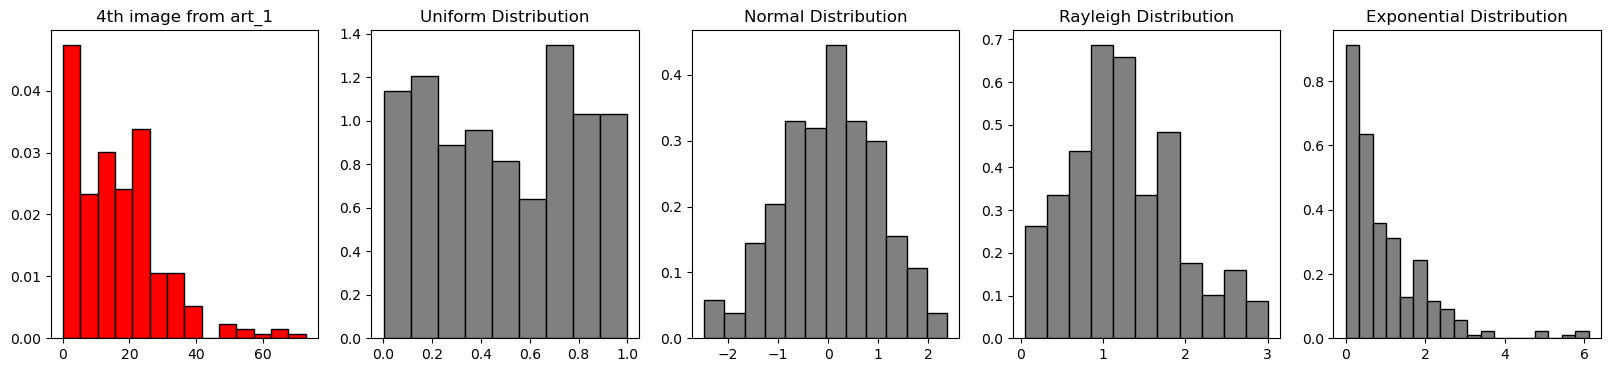

In [24]:
image = imagesDictionary['ART'][3, :, :, :]
image =  cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
hist, bin_edges = np.histogram(image, bins=list(range(256)))

print(f"Normal distribution K-S test: {stats.ks_2samp(normal_distribution, hist)}")
print(f"Uniform distribution K-S test: {stats.ks_2samp(uniform_distribution, hist)}")
print(f"Rayleigh distribution K-S test: {stats.ks_2samp(rayleigh_distribution, hist)}")
print(f"Explonential distribution K-S test: {stats.ks_2samp(exponential_distribution, hist)}")

plt.figure(figsize=(20, 4))
plt.subplot(1, 5, 1)
plt.hist(hist, density=True, bins='auto', alpha=1, color="red", edgecolor="black")
plt.title("4th image from art_1")
plt.subplot(1, 5, 2)
plt.hist(uniform_distribution, density=True, bins='auto', alpha=1, color="gray", edgecolor="black")
plt.title("Uniform Distribution")
plt.subplot(1, 5, 3)
plt.hist(normal_distribution, density=True, bins='auto', alpha=1, color="gray", edgecolor="black")
plt.title("Normal Distribution")
plt.subplot(1, 5, 4)
plt.hist(rayleigh_distribution, density=True, bins='auto', alpha=1, color="gray", edgecolor="black")
plt.title("Rayleigh Distribution")
plt.subplot(1, 5, 5)
plt.hist(exponential_distribution, density=True, bins='auto', alpha=1, color="gray", edgecolor="black")
plt.title("Exponential Distribution")
plt.savefig("plotted_distributions.jpg")

### Statistical Moments

#### Mean

In [25]:
blueMeans, greenMeans, redMeans = [], [], []
for label in imagesDictionary.keys():
    blueMean, greenMean, redMean = np.mean(imagesDictionary[label], axis=(0, 1, 2))
    blueMeans.append(blueMean)
    greenMeans.append(greenMean)
    redMeans.append(redMean)

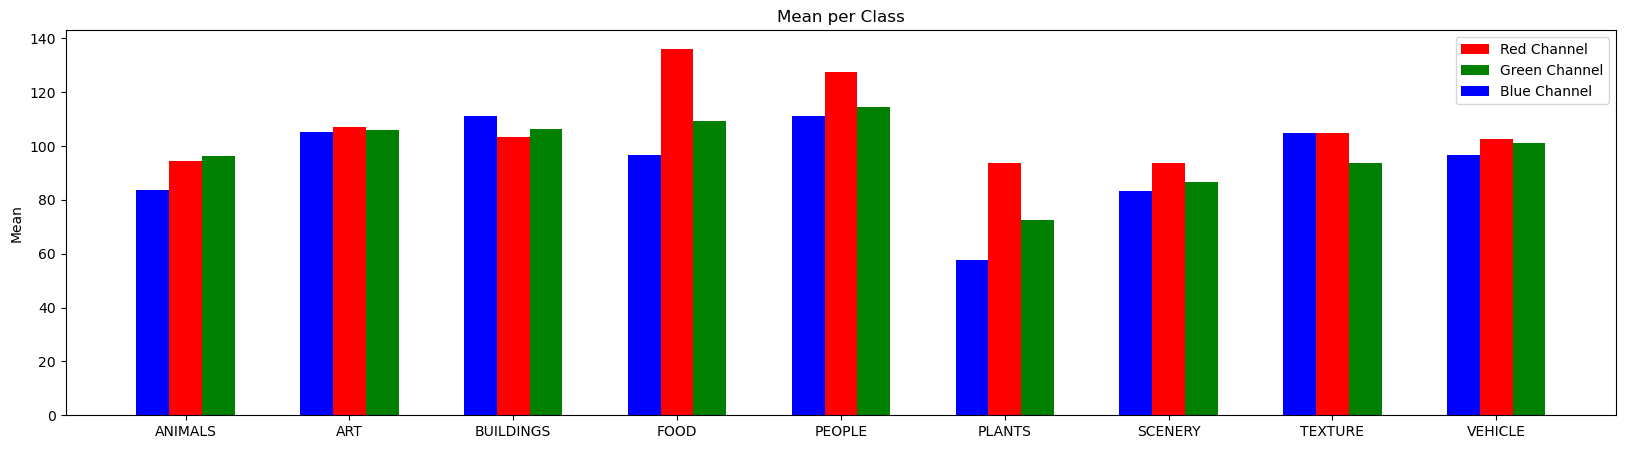

In [26]:
labels = imagesDictionary.keys()
y_pos = np.arange(0, len(labels) * 2.5, 2.5)
width = 0.5

plt.figure(figsize=(20, 5))
plt.bar(y_pos, redMeans, align='center', width=width, color = "red", label = "Red Channel")
plt.bar(y_pos + width , greenMeans, align='center', width=width, color = "green", label = "Green Channel")
plt.bar(y_pos - width, blueMeans, align='center', width=width, color = "blue", label = "Blue Channel")
plt.xticks(y_pos, labels)
plt.ylabel('Mean')
plt.title('Mean per Class')
plt.legend()
# plt.savefig("mean_per_class.jpg")
plt.show()

#### Variance

In [27]:
plt.show()
blueVars, greenVars, redVars = [], [], []
for label in imagesDictionary.keys():
    blueVar, greenVar, redVar = np.var(imagesDictionary[label], axis=(0, 1, 2))
    blueVars.append(blueVar)
    greenVars.append(greenVar)
    redVars.append(redVar)

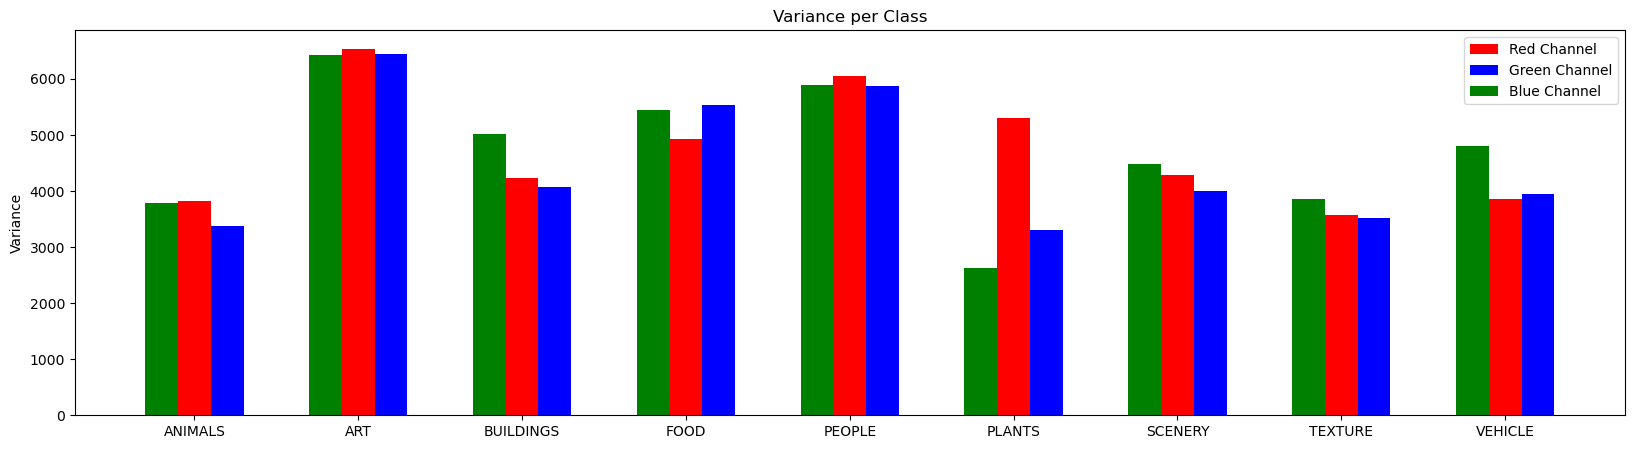

In [28]:
labels = imagesDictionary.keys()
y_pos = np.arange(0, len(labels) * 2.5, 2.5)
width = 0.5

plt.figure(figsize=(20, 5))
plt.bar(y_pos, redVars, align='center', width=width, color = "red", label = "Red Channel")
plt.bar(y_pos + width , greenVars, align='center', width=width, color = "blue", label = "Green Channel")
plt.bar(y_pos - width, blueVars, align='center', width=width, color = "green", label = "Blue Channel")
plt.xticks(y_pos, labels)
plt.ylabel('Variance')
plt.title('Variance per Class')
plt.legend()
# plt.savefig("variance_per_class.jpg")
plt.show()

In [30]:
image = imagesDictionary['ART'][3, :, :, :]
image =  cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image_r = image[:, :, 0]
image_g = image[:, :, 1]
image_b = image[:, :, 2]
image_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

print(f"Red channel - mean: {np.mean(image_r)}, variance: {np.var(image_r)}")
print(f"Green channel - mean: {np.mean(image_g)}, variance: {np.var(image_g)}")
print(f"Blue channel - mean: {np.mean(image_b)}, variance: {np.var(image_b)}")
print(f"Grayscale - mean: {np.mean(image_gray)}, variance: {np.var(image_gray)}")

Red channel - mean: 142.133544921875, variance: 4600.496570050716
Green channel - mean: 109.20263671875, variance: 3446.9696805477142
Blue channel - mean: 40.443359375, variance: 723.9826316833496
Grayscale - mean: 111.215087890625, variance: 3207.7825946211815
